<a href="https://colab.research.google.com/github/RodolfoFigueroa/madi2024/blob/main/Unidad_1/02_Recursion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import matplotlib.pyplot as plt
import numpy as np

En esta sesión veremos algunos ejemplos clásicos donde las recursiones juegan un papel muy importante.

# Sucesión de Fibonacci

Es de las mas famosas dentro de las sucesiones definidas recursivamente. Los términos de la sucesión se definen por:

\begin{align}
F_0 = 0,\ F_1 = 1\\
F_n = F_{n-1} + F_{n-2}
\end{align}

Veamos algunos ejemplos relacionados con esta sucesión.

## Ejemplo 1

**Muestra que cualesquiera dos números consecutivos en la sucesión de Fibonacci son primos relativos.**

---

Probaremos por inducción que para todo entero positivo $n$, se cumple:

$$(F_n, F_{n-1}) = 1$$

donde $(x,y)$ es el máximo común divisor de $x$ y $y$.

**Demostración:**

* Caso base: Claramente:

$$(0, 1) = 1$$

* Hipótesis de inducción: 

$$(F_k, F_{k-1}) = 1$$

* Paso inductivo: Usando que $(a,b) = (a-b, b)$ Notemos que 

\begin{align*}
(F_{k+1}, F_k) &= (F_{k+1} - F_k, F_k) \\
&= (F_{k-1}, F_k) \\
&= 1
\end{align*}
Lo último por nuestra hipótesis de inducción. 

Concluimos que en efecto, $(F_n, F_{n-1}) = 1$ para todo entero positivo $n$.

## Ejemplo 2 

**Encuentra el residuo de $F_{100005}$ al ser dividido entre $23$.**

---

Primero, recordemos la definición de los números de Fibonacci:

$$
F_{k+1} = F_k + F_{k-1}
$$

Aplicando la función de módulo $a$ de ambos lados:

$$
F_{k+1}\ \text{mod}\ a = (F_k + F_{k-1})\ \text{mod}\ a
$$

Por las propiedades del módulo, el lado derecho es equivalente a:

$$
(F_k\ \text{mod}\ a + F_{k-1}\ \text{mod}\ a)\ \text{mod}\ a
$$

Es decir:

$$
F_{k+1}\ \text{mod}\ a = (F_k\ \text{mod}\ a + F_{k-1}\ \text{mod}\ a)\ \text{mod}\ a
$$

En otras palabras, esta ecuación nos da una manera de escribir el residuo de $F_{k+1}$ al ser dividido por $a$ como función de los residuos de $F_k$ y $F_{k-1}$. 

La ecuación tal vez se vea más clara si definimos $\tilde{F}_k \equiv F_k\ \text{mod}\ a$:

$$
\tilde{F}_{k+1} = (\tilde{F}_{k} + \tilde{F}_{k-1})\ \text{mod}\ a
$$

Esto nos dice que, al igual que la sucesión de Fibonacci original, cada término de la sucesión de los residuos depende únicamente de los dos anteriores. Por lo tanto, podemos escribir su definición recursiva:

\begin{align}
    \tilde{F}_0 = 0,\ \tilde{F}_1 = 1\\
    \tilde{F}_n = (\tilde{F}_{n-1} + \tilde{F}_{n-2})\ \text{mod}\ a
\end{align}

---

Ahora, por las propiedades del módulo, $F_k\ \text{mod}\ a$ sólo puede tener $a$ valores distintos. Entonces, sólo puede haber $a^2$ parejas distintas de la forma $(\tilde{F}_{k-1}, \tilde{F}_{k-2})$. 

Finalmente, como la serie de residuos tiene un número infinito de términos, pero solo hay un número finito de parejas posible ($a^2$), por el principio de las casillas concluimos que eventualmente las parejas se van a repetir. Pero como cada término de la serie está definido por los dos anteriores, esto nos dice que, eventualmente, los términos se van a empezar a repetir. Es más, se repetirán en el mismo orden que aparecieron la primera vez; en otras palabras, la sucesión es **cíclica**.

Es muy importante notar que para que la serie se repita, no basta con que aparezca uno solo de los términos, tiene que aparecer la **pareja**; 

---

Regresando al problema que queríamos resolver, el hecho de que determinamos que las serie es cíclica nos será de utilidad. Para ver por qué, consideremos la serie módulo 11, que tiene un período pequeño:

$$
0, 1, 1, 2, 3, 5, 8, 2, 10, 1,\ |\ 0, 1, 1, 2, 3, 5, 8, 2, 10, 1,\ |\ 0, 1, 2, \ldots
$$

Podemos ver que se empieza a repetir después de 10 términos. 

Ahora, supongamos que queremos encontrar el residuo del término en el lugar 22 al ser dividido por 11. Como los términos se repiten de diez en diez, esto es equivalente a pedir el residuo del término:

$$
22 - 10 = 12
$$

Lo cual a su vez equivale al residuo del término:

$$
12 - 10 = 2
$$

Es decir, queremos el residuo número 2 de la serie anterior, que es 1.

En general, si queremos el residuo del $k$-ésimo término al ser dividido por 11, esto es equivalente al residuo del término:

$$
k\ \text{mod}\ 10
$$

O, aún más generalmente, si sabemos que el período de la serie módulo $a$ es $p$, el residuo del $k$-ésimo término al ser dividido por $a$ será:

$$
k\ \text{mod}\ p
$$

Entonces, para resolver nuestro problema, basta con encontrar el período de la serie módulo 23, lo cual hacemos a continuación:

In [50]:
remainders = [0, 1]
current_pair = (0, 1)

while True:
    current_pair = (current_pair[1], (current_pair[0] + current_pair[1]) % 23)
    if current_pair == (0, 1):
        break
    remainders.append(current_pair[1])

len(remainders) - 1 # Descontamos el último término, ya que se repite

48

Entonces, el residuo 100,005 es idéntico al residuo:

$$
100\, 005\ \text{mod}\ 48 = 21
$$

En la lista `remainders` anterior, fuimos guardando todos los residuos; entonces, accesando el número 21:

In [52]:
remainders[21]

21

# Celdas coloreadas

Supongamos que tenemos una cuadrícula de $m\times n$. Cada celda de esta cuadrícula puede estar coloreada o no; el problema que queremos resolver es, dada la coordenada de una celda $(i, j)$, determinar el número de celdas que tiene la *masa* a la que pertenece.

Definimos la *masa* como el conjunto de todas las celdas coloreadas que son adyacentes en una de las cuatro direcciones cardinales; por ejemplo, para la siguiente cuadrícula, donde `X` indica si una celda está coloreada o no:

```
| X |   |   | X | X |
| X | X |   |   | X |
|   | X |   | X |   |
|   | X |   | X |   |
|   | X |   | X |   |
|   |   | X | X |   |
```

Hay 3 masas distintas; la de arriba a la izquierda, la de abajo al centro, y la de arriba a la derecha. Notemos que a pesar de que las masas colindan en las esquinas, como no son adyacentes cardinalmente, las consideramos como dsititnas.

---

Para resolver este problema, podemos utilizar recursión; la idea general del algoritmo es pararnos en la celda deseada, checar sus vecinos, los vecinos de sus vecinos, y así sucesivamente. 

Entonces, definimos una función `measure_blob(i, j)`, que regresa un entero igual al número de celdas en la masa que contiene a la celda con coordenadas $(i, j)$. El primer paso es definir sus casos base, de los cuales hay dos:

1. Las coordenadas están fuera de la cuadrícula.
2. La celda está vacía.

En el caso del primero, dado que no puede haber una celda llena fuera de la cuadrícula, regresamos cero.

En el caso del segundo, como la celda está vacía, no pertenece a ninguna masa, entonces también regresamos cero.

Si ninguno de estos dos pasa, contamos la celda actual (ya que está llena), y corremos la función para cada uno de sus vecinos, añadiendo el resultado de cada uno al contador.

Entonces, escribiendo esto en código:

In [ ]:
def measure_blob(grid, i, j):
    m, n = grid.shape

    if i < 0 or m < i:
        return 0
    if j < 0 or n < j:
        return 0

    counter = 1
    for offset in (+1, +1), (+1, -1), (-1, +1), (-1, -1):
        ii = i + offset[0]
        jj = j + offset[1]
        counter += measure_blob(grid, ii, jj)
    
    return counter  

Adicionalmente, definimos la cuadrícula anterior como un arreglo de numpy; si la celda está coloreada tendrá un 1, de otra manera tendrá un 0:

In [60]:
grid = np.array([
    [1, 0, 0, 1, 1],
    [1, 1, 0, 0, 1],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 1, 1, 0]
])

Graficando:

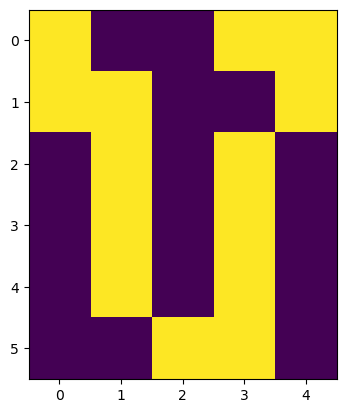

In [61]:
plt.imshow(grid)

Si ejecutamos la función que definimos con esta cuadrícula y algún par arbitrario de coordenadas, podremos ver que nunca acaba.

Para entender por qué ocurre esto, imaginemos que llamamos la función en la celda $(0, 0)$. Dado que la celda está dentro de las fronteras y no está vacía, hará la llamada recursiva hacia sus cuatro vecinos, incluyendo la celda $(1, 0)$. Asimismo, esta celda llamará recursivamente la función sobre la celda $(0, 0)$, la cual llamará la función sobre la celda $(1, 0)$ y así sucesivamente hasta el infinito.

Entonces, queremos encontrar una manera de garantizar que, una vez que una celda haya sido visitada, no vuelva a serlo. Podemos hacer esto con un arreglo adicional al que llamaremos `visited`, de la misma forma que la cuadrícula. Al principio, todos sus valores serán `False`; cuando visitemos la celda con coordenadas $(i, j)$, cambiaremos la correspondiente entrada a `True`. Antes de hacer las llamadas recursivas, verificaremos que la entrada de la celda que queremos visitar sea `False`; de otra manera, la saltamos.

Entonces, con estas modificaciones, la función queda:

In [79]:
np.zeros((3, 2), dtype=bool)

array([[False, False],
       [False, False],
       [False, False]])

In [94]:
def measure_blob_2(grid, i, j, visited=None):
    m, n = grid.shape
    
    if visited is None:
        visited = np.zeros((m, n), dtype=bool)

    if i < 0 or m < i:
        return 0
    if j < 0 or n < j:
        return 0
    if grid[i, j] == 0:
        return 0

    counter = 1
    visited[i, j] = True

    for offset in [(+1, 0), (-1, 0), (0, +1), (0, -1)]:
        ii = i + offset[0]
        jj = j + offset[1]

        if 0 <= ii < m and 0 <= jj < n:
            if not visited[ii, jj]:
                counter += measure_blob_2(grid, ii, jj, visited=visited)
    
    return counter  

In [95]:
measure_blob_2(grid, 0, 0)

6

## Ejercicio 1 

Con algunas pequeñas modificaciones, la función `measure_blob_2` puede ser utilizada para contar el número de masas total. Realiza estas modificaciones, argumenta por qué son correctas, y pruébala para la cuadrícula que usamos de ejemplo (para la cual el resultado debe de ser 3).

## Ejercicio 2

Muestra que al considerar la sucesión de Fibonacci módulo $n$, la sucesión obtenida se cicla desde el principio.

## Ejercicio 3

(Reto, no obligatorio). Muestra que los ciclos de menor longitud en la sucesión de Fibonacci módulo $n$ tienen $1, 2$ o $4$ ceros.